# The Sparks Foundation - Prediction using Supervised ML
Task - Predict the percentage of an student based on the number of study hours.

Author - Rubal Bansal

### Import Libraries
Importing all libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### The Data
Reading data from the link

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported")

df.head()

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Note: There are no null values and also no categorial features.

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory Data Analysis

We'll plot the data to see the relationships between the two.(if any)

#### Distribution of Scores

Text(0.5, 1.0, 'Distribution of Scores')

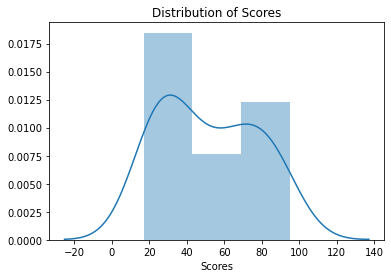

In [6]:
sns.distplot(df["Scores"], kde=True)
plt.title('Distribution of Scores')

#### Plotting the scatter diagram

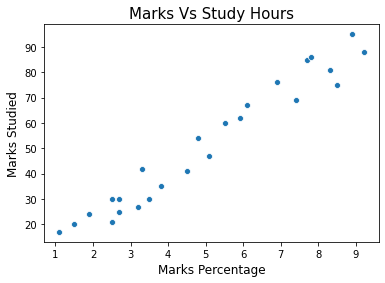

In [7]:
sns.scatterplot(x=df["Hours"], y=df["Scores"])
plt.title("Marks Vs Study Hours",size=15)
plt.xlabel('Marks Percentage',size=12)
plt.ylabel('Marks Studied',size=12)
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.
#### Plotting the regression line

Text(0.5, 1.0, 'Hours VS Scores')

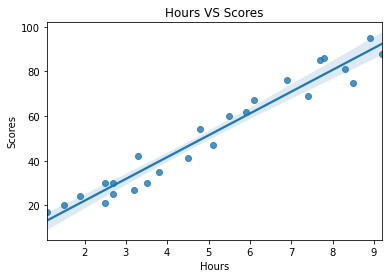

In [8]:
sns.regplot(x=df["Hours"], y=df["Scores"])
plt.title('Hours VS Scores')

## Building a Linear Regression model
Let's start preparing the data by splitting the data into a training set and testing set.

#### Train Test Split

In [9]:
# "attributes" - inputs
X = df.iloc[:, :-1].values 

# "labels" - outputs
y = df.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

#### Training the Model
We have split our data into training and testing sets, and now is finally the time to train our Model.

In [11]:
from sklearn.linear_model import LinearRegression  
legmodel = LinearRegression()  
legmodel.fit(X_train, y_train) 

print("Training complete")

Training complete


#### Visualising the training set results

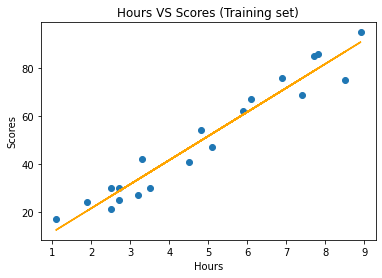

In [12]:
plt.scatter(X_train, y_train)
plt.plot(X_train,  legmodel.predict(X_train), color= 'orange')
plt.title('Hours VS Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Making Predictions
Let's predict the scores for our testing data.

In [13]:
y_pred = legmodel.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(5)

,Actual,Predicted
0,35,39.594215
1,60,56.684534
2,20,16.472019
3,88,93.881110
4,81,84.833294


#### Visualising the test set results

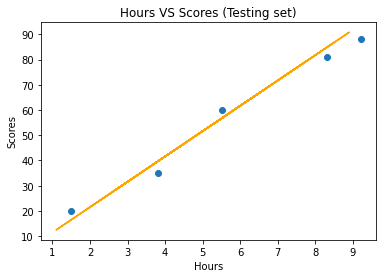

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_train,  legmodel.predict(X_train), color='orange')
plt.title('Hours VS Scores (Testing set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Evaluating the model
Checking Mean Absolute Error, R2-Score and Adjusted R2-Score using metrics and r2_score

In [15]:
from sklearn import metrics  
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')

Mean Absolute Error: 4.2304132231404825


In [16]:
n = len(X_test)
k = X_test.shape[1]

from sklearn.metrics import r2_score
from math import sqrt

r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print(f'R2 = {r2} \nAdjusted R2 = {adj_r2}')

R2 = 0.9723939704109645 
Adjusted R2 = 0.9631919605479528


## Answer 
what will be the predicted score of a student if he/she studies for 9.25 hrs/day?

In [17]:
hours = [[9.25]]
pred = legmodel.predict(hours)
print(f"No of Hours = {hours[0][0]}")
print(f"Predicted Score = {pred[0]}")

No of Hours = 9.25
Predicted Score = 94.38376623376621
